In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile, RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.api.types import is_numeric_dtype
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

In [20]:
properti = pd.read_csv('/Users/saktiyoga/Downloads/UTS_PMDPM/Dataset UTS_Gasal 2425.csv')
properti.head(100)
# from google.colab import drive
# drive.mount('/content/drive')
# properti=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/paris_housing.csv')
# properti.head(100)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98868,41,no,yes,67,85917,7,3,2021,new,yes,2146,1077,623,yes,3,9892300.1,Luxury
96,83110,43,yes,no,75,55046,7,10,2001,new,no,4108,5663,380,yes,7,8321631.1,Luxury
97,71154,67,no,yes,53,8762,2,6,2021,new,yes,8418,7187,706,no,8,7122699.1,Luxury
98,90841,48,yes,no,15,25300,6,5,2003,old,no,3333,149,842,no,9,9086177.3,Luxury


In [21]:
properti2 = properti.drop('price', axis=1)
properti2.head(100)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98868,41,no,yes,67,85917,7,3,2021,new,yes,2146,1077,623,yes,3,Luxury
96,83110,43,yes,no,75,55046,7,10,2001,new,no,4108,5663,380,yes,7,Luxury
97,71154,67,no,yes,53,8762,2,6,2021,new,yes,8418,7187,706,no,8,Luxury
98,90841,48,yes,no,15,25300,6,5,2003,old,no,3333,149,842,no,9,Luxury


In [22]:
print("data null \n", properti2.isnull().sum())
print("data kosong \n", properti2.empty)
print("data nan \n", properti2.isna().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64
data kosong 
 False
data nan 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64


In [23]:
print("Sebelum drop missing value", properti2.shape)
properti2 = properti2.dropna(how="any", inplace=False)
print("Setelah drop missing value", properti2.shape)

Sebelum drop missing value (10000, 17)
Setelah drop missing value (10000, 17)


In [24]:
print("Sebelum Pengecekan data duplikat", properti2.shape)
properti3 = properti2.drop_duplicates(keep='last')
print("Setelah Pengecekan data duplikat", properti3.shape)

Sebelum Pengecekan data duplikat (10000, 17)
Setelah Pengecekan data duplikat (10000, 17)


In [25]:
kolom_kategori=['hasyard', 'haspool', 'isnewbuilt',
          'hasstormprotector', 'hasstorageroom']
transform = make_column_transformer(
    (OneHotEncoder(), kolom_kategori),
    remainder = 'passthrough'
)

In [26]:
x=properti3.drop('category',axis=1)
y=properti3.category

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=84)

print(x_train.shape)
print(x_test.shape)

(8000, 16)
(2000, 16)


In [27]:
x_train_enc = transform.fit_transform(x_train)
x_test_enc = transform.fit_transform(x_test)

df_train_enc = pd.DataFrame (x_train_enc, columns=transform.get_feature_names_out())
df_test_enc = pd.DataFrame (x_test_enc, columns=transform.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,97.0,45.0,62899.0,1.0,9.0,1990.0,4110.0,1675.0,599.0,4.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,76.0,54.0,82737.0,7.0,3.0,1998.0,4010.0,8343.0,260.0,10.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,72.0,26.0,7812.0,6.0,3.0,1995.0,6972.0,3804.0,828.0,8.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,46.0,51.0,91317.0,5.0,3.0,2020.0,3337.0,7250.0,337.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,4.0,30.0,8424.0,4.0,10.0,2003.0,5655.0,1684.0,453.0,8.0
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,47.0,14.0,50927.0,9.0,6.0,1993.0,4078.0,315.0,767.0,10.0
6,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,54.0,15.0,61691.0,2.0,2.0,2002.0,5925.0,9705.0,342.0,8.0
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,42.0,50.0,50833.0,3.0,8.0,2009.0,9320.0,5752.0,936.0,3.0
8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,97.0,3.0,68804.0,10.0,5.0,1991.0,5804.0,2070.0,846.0,9.0
9,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,18.0,26.0,67302.0,6.0,2.0,2005.0,6111.0,771.0,500.0,10.0


In [28]:
pipe_GBT_kbest = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest()),
    ('classifier', GradientBoostingClassifier(random_state=84))
])

pipe_GBT_percentile = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectPercentile()),
    ('classifier', GradientBoostingClassifier(random_state=84))
])

param_grid_GBT_kbest = {
    'feature_selection__k': [3, 5],
    'classifier__n_estimators': [50, 100],
    'classifier__learning_rate': [0.005, 0.01],
    'classifier__max_depth': [3]
}

param_grid_GBT_percentile = {
    'feature_selection__percentile': [30, 50],
    'classifier__n_estimators': [50, 100],
    'classifier__learning_rate': [0.005, 0.01],
    'classifier__max_depth': [3]
}

In [29]:
gscv_GBT_kbest = GridSearchCV(pipe_GBT_kbest, param_grid_GBT_kbest, cv=StratifiedKFold(n_splits=5))
gscv_GBT_kbest.fit(x_train_enc, y_train)
print("GSCV finished")

gscv_GBT_percentile = GridSearchCV(pipe_GBT_percentile, param_grid_GBT_percentile, cv=StratifiedKFold(n_splits=5))
gscv_GBT_percentile.fit(x_train_enc, y_train)
print("GSCV finished")

GSCV finished
GSCV finished


Best model:Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=3)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.005,
                                            n_estimators=50,
                                            random_state=84))])
Selected features:Index(['onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'remainder__squaremeters'],
      dtype='object')
Best CV score: 0.94
Train set score: 0.93


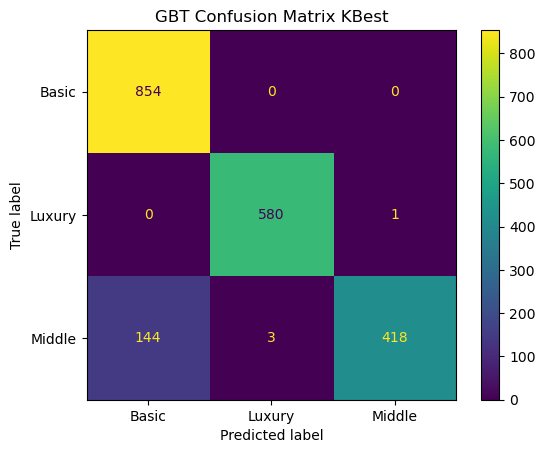

Classification report GBT KBest: 
               precision    recall  f1-score   support

       Basic       0.86      1.00      0.92       854
      Luxury       0.99      1.00      1.00       581
      Middle       1.00      0.74      0.85       565

    accuracy                           0.93      2000
   macro avg       0.95      0.91      0.92      2000
weighted avg       0.94      0.93      0.92      2000

Best model:Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectPercentile(percentile=30)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.005,
                                            n_estimators=50,
                                            random_state=84))])
Selected features:Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'remainder__squaremeters'],
      dtype='obj

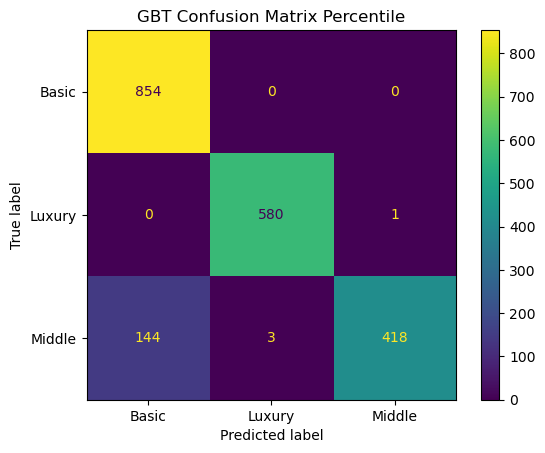

Classification report GBT Percentile: 
               precision    recall  f1-score   support

       Basic       0.86      1.00      0.92       854
      Luxury       0.99      1.00      1.00       581
      Middle       1.00      0.74      0.85       565

    accuracy                           0.93      2000
   macro avg       0.95      0.91      0.92      2000
weighted avg       0.94      0.93      0.92      2000



In [30]:
mask = gscv_GBT_kbest.best_estimator_.named_steps['feature_selection'].get_support()

print("Best model:{}".format(gscv_GBT_kbest.best_estimator_))
print("Selected features:{}".format(df_train_enc.columns[mask]))

print("Best CV score: {:.2f}".format(gscv_GBT_kbest.best_score_))
print("Train set score: {:.2f}".format(gscv_GBT_kbest.score(x_test_enc,y_test)))

GBT_pred = gscv_GBT_kbest.predict(x_test_enc)

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, GBT_pred, labels=gscv_GBT_kbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gscv_GBT_kbest.classes_)
disp.plot()
plt.title("GBT Confusion Matrix KBest")
plt.show()
#tampilkan classification report
print("Classification report GBT KBest: \n", classification_report(y_test,GBT_pred))

mask = gscv_GBT_percentile.best_estimator_.named_steps['feature_selection'].get_support()

print("Best model:{}".format(gscv_GBT_percentile.best_estimator_))
print("Selected features:{}".format(df_train_enc.columns[mask]))

print("Best CV score: {:.2f}".format(gscv_GBT_percentile.best_score_))
print("Train set score: {:.2f}".format(gscv_GBT_percentile.score(x_test_enc,y_test)))

GBT_pred = gscv_GBT_percentile.predict(x_test_enc)

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, GBT_pred, labels=gscv_GBT_percentile.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gscv_GBT_percentile.classes_)
disp.plot()
plt.title("GBT Confusion Matrix Percentile")
plt.show()
#tampilkan classification report
print("Classification report GBT Percentile: \n", classification_report(y_test,GBT_pred))

In [31]:
pipe_svm_percentile = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectPercentile()),
    ('classifier', SVC(random_state=84))
])

pipe_svm_kbest = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest()),
    ('classifier', SVC(random_state=84))
])

param_grid_svm_kbest = {
    'feature_selection__k': [2, 3, 5],
    'classifier__C': [0.01, 0.1, 1],
    'classifier__kernel': ['rbf', 'linear']
}

param_grid_svm_percentile = {
    'feature_selection__percentile': [20, 30, 50],
    'classifier__C': [0.01, 0.1, 1],
    'classifier__kernel': ['rbf', 'linear']
}

In [32]:
gscv_SVM_kbest = GridSearchCV(pipe_svm_kbest, param_grid_svm_kbest, cv=StratifiedKFold(n_splits=5))
gscv_SVM_kbest.fit(x_train_enc, y_train)
print("GSCV finished")

gscv_SVM_percentile = GridSearchCV(pipe_svm_percentile, param_grid_svm_percentile, cv=StratifiedKFold(n_splits=5))
gscv_SVM_percentile.fit(x_train_enc, y_train)
print("GSCV finished")

GSCV finished
GSCV finished


Best model:Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature_selection', SelectKBest(k=2)),
                ('classifier', SVC(C=1, random_state=84))])
Selected features:Index(['onehotencoder__haspool_yes', 'remainder__squaremeters'], dtype='object')
Best CV score: 0.93
Train set score: 0.92


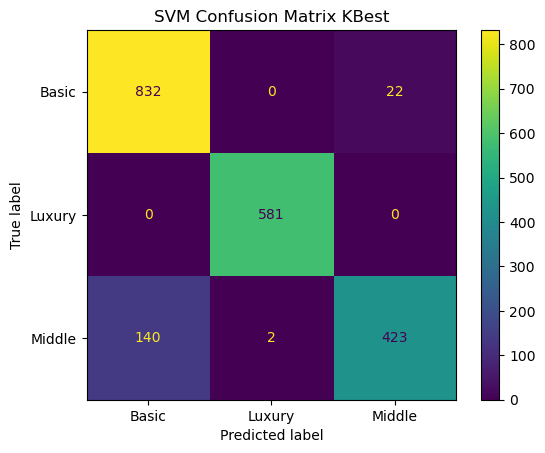

Classification report SVM KBest: 
               precision    recall  f1-score   support

       Basic       0.86      0.97      0.91       854
      Luxury       1.00      1.00      1.00       581
      Middle       0.95      0.75      0.84       565

    accuracy                           0.92      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Best model:Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectPercentile(percentile=30)),
                ('classifier', SVC(C=1, random_state=84))])
Selected features:Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'remainder__squaremeters'],
      dtype='object')
Best CV score: 0.99
Train set score: 0.98


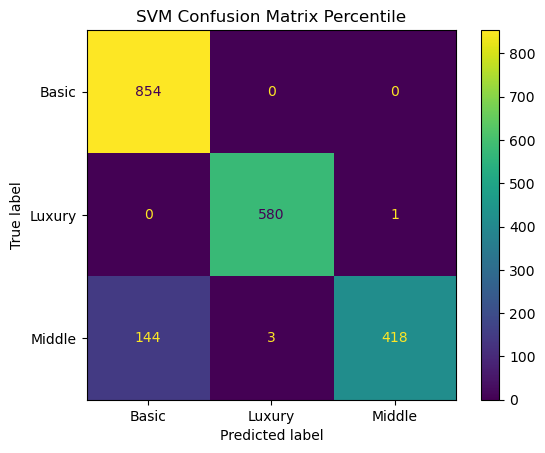

Classification report SVM Percentile: 
               precision    recall  f1-score   support

       Basic       0.99      0.99      0.99       854
      Luxury       0.99      0.99      0.99       581
      Middle       0.97      0.98      0.97       565

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.98      0.99      2000



In [33]:
mask = gscv_SVM_kbest.best_estimator_.named_steps['feature_selection'].get_support()

print("Best model:{}".format(gscv_SVM_kbest.best_estimator_))
print("Selected features:{}".format(df_train_enc.columns[mask]))

print("Best CV score: {:.2f}".format(gscv_SVM_kbest.best_score_))
print("Train set score: {:.2f}".format(gscv_SVM_kbest.score(x_test_enc,y_test)))

SVM_pred = gscv_SVM_kbest.predict(x_test_enc)

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, SVM_pred, labels=gscv_GBT_kbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gscv_SVM_kbest.classes_)
disp.plot()
plt.title("SVM Confusion Matrix KBest")
plt.show()
#tampilkan classification report
print("Classification report SVM KBest: \n", classification_report(y_test,SVM_pred))


mask = gscv_SVM_percentile.best_estimator_.named_steps['feature_selection'].get_support()

print("Best model:{}".format(gscv_SVM_percentile.best_estimator_))
print("Selected features:{}".format(df_train_enc.columns[mask]))

print("Best CV score: {:.2f}".format(gscv_SVM_percentile.best_score_))
print("Train set score: {:.2f}".format(gscv_SVM_percentile.score(x_test_enc,y_test)))

SVM_pred = gscv_SVM_percentile.predict(x_test_enc)

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, GBT_pred, labels=gscv_SVM_percentile.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gscv_SVM_percentile.classes_)
disp.plot()
plt.title("SVM Confusion Matrix Percentile")
plt.show()
#tampilkan classification report
print("Classification report SVM Percentile: \n", classification_report(y_test,SVM_pred))

In [35]:
import pickle
best_model = gscv_SVM_percentile.best_estimator_

with open('BestModel_CLF_gscv_SVM_percentile_matplotlib.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("Model Terbaik berhasil disimpan ke 'BestModel_CLF_gscv_SVM_percentile_matplotlib.pkl.pkl'")

Model Terbaik berhasil disimpan ke 'BestModel_CLF_gscv_SVM_percentile_matplotlib.pkl.pkl'
